In [1]:
import glob
from GeospatialPreProcessing_Utils import *
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.ops import unary_union
from rasterio.mask import mask
import numpy as np
from osgeo import gdal

In [ ]:
##### DATASET DOWNLOAD LINKS #####
# nhd dataset (watershed boundaries) stored in Github/Watershed_Clustering/Datasets/nhd/...
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Hydrography/NHD/State/Shape/NHD_H_Kentucky_State_Shape.zip

# ky state boundary stored in Github/Watershed_Clustering/Datasets/ky_boundaries/...
# https://prd-tnm.s3.amazonaws.com/StagedProducts/GovtUnit/Shape/GOVTUNIT_Kentucky_State_Shape.zip

# 1/3-arc-second usgs dem tiles stored in Github/Watershed_Clustering/Datasets/dem_10m/...
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w087_20210617.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w084_20220311.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w089_20240104.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w082_20230911.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w086_20210617.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w083_20230911.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w090_20231226.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w088_20221205.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w088_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w083_20220512.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w086_20190716.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w088_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w085_20220311.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w090_20231226.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w082_20220512.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w085_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w084_20230123.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w088_20221205.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w087_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w084_20200302.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w085_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w085_20171101.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w086_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w089_20221205.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w084_20181127.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w082_20230911.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w087_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w083_20230816.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w089_20230123.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w090_20221205.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w083_20230911.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w090_20230303.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w089_20220318.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w082_20230816.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w086_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w087_20230407.tif

# Merge DEM Tiles

In [17]:
# directory containing the geotiff tiles for merging
# dem_tiles_dir = r'C:\Users\mamass1\Documents\GitHub\Watershed_Clustering\Datasets\dem_10m'
dem_tiles_dir = r'dem_10m'


# path to output file name for new mosaic geotiff
# output_path = r'C:\Users\mamass1\Documents\GitHub\Watershed_Clustering\Datasets\dem_10m\dem_merged.tif'
output_path = r'dem_10m/dem_merged.tif'


# call custom function to merge tiles and save new raster
mosaic_dem_tiles(dem_tiles_dir, output_path)

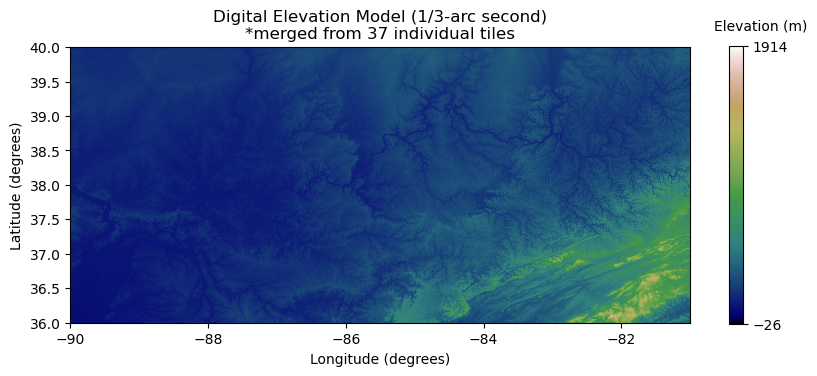

In [18]:
# plot the mosaiced raster...
# open new mosaic dem as rasterio dataset
dem = rasterio.open(output_path)

# create fig and ax objects, define figure size
fig, ax = plt.subplots(figsize=(10, 6))

# rasterio.plot.show correctly plots raster's spatial extent
cax = show(dem, ax=ax, cmap='gist_earth')

# set colorbar legend...
im = cax.get_images()[0]     # get image object for colorbar
cbar = fig.colorbar(im, ax=ax, shrink=0.60)     # create colorbar object
cbar.set_ticks([dem.read(1).min(), dem.read(1).max()])
cbar.set_label('Elevation (m)', labelpad=-20, y=1.1, rotation=0)     # set colorbar label

# title and labels...
n_tiles = len(glob.glob(os.path.join(dem_tiles_dir, '*.tif')))     # number of tiles used in mosaic
ax.set_title(f'Digital Elevation Model (1/3-arc second)\n*merged from {n_tiles} individual tiles')
ax.set_xlabel('Longitude (degrees)')
ax.set_ylabel('Latitude (degrees)')
plt.show()

# close dem dataset
dem.close()

# Extract Watersheds of Kentucky

In [19]:
# path to kentucky state boundary (area polygon) shapefile
kentucky_boundary_path = r'ky_boundaries/GU_StateOrTerritory.shp'

# path to huc10 watershed boundaries (area polygon) shapefile
huc10_watersheds_path = r'nhd/WBDHU10.shp'

# read shapefiles into geodataframes
gdf_ky = gpd.read_file(kentucky_boundary_path)
gdf_huc10 = gpd.read_file(huc10_watersheds_path)

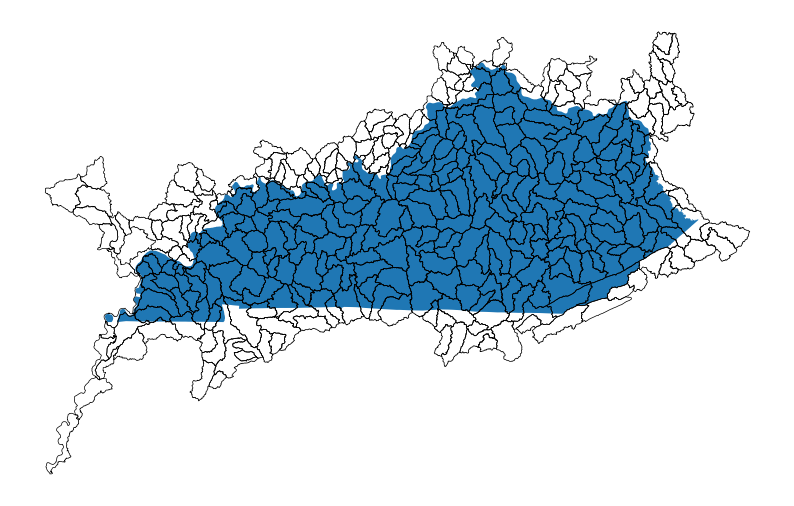

In [11]:
# plot shapefiles...
fig, ax = plt.subplots(figsize=(10,10))

# plot kentucy polyon on bottom
gdf_ky.plot(ax=ax)

# plot outlines of huc10 watersheds on top
gdf_huc10.boundary.plot(ax=ax, edgecolor='k', linewidth=0.5)

# turn off axes
ax.axis('off')
plt.show()

In [12]:
# extract huc10 watersheds that are within or intersect kentucky using spatial join
gdf_ky_huc10 = gpd.sjoin(left_df = gdf_huc10, 
                         right_df = gdf_ky, 
                         how = 'inner', 
                         predicate = 'intersects')

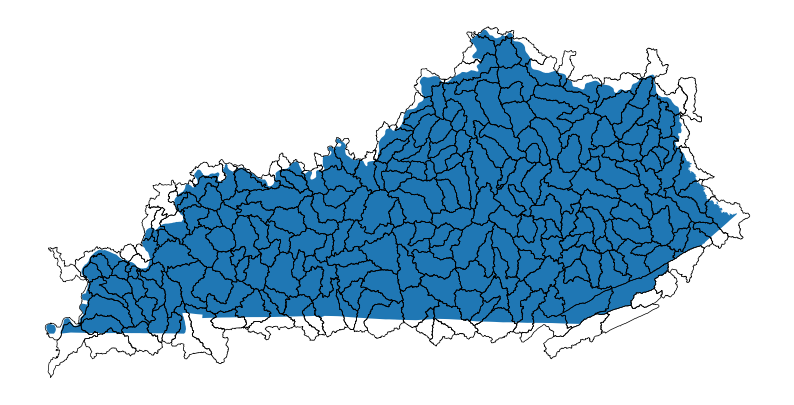

In [13]:
# plot extracted watershed boundaries to verify...
fig, ax = plt.subplots(figsize=(10,10))
gdf_ky.plot(ax=ax)
gdf_ky_huc10.boundary.plot(ax=ax, edgecolor='k', linewidth=0.5)
ax.axis('off')
plt.show()

In [14]:
# clean up unnecessary columns in new huc10 boundaries
gdf_ky_huc10.drop(columns=['tnmid', 'metasource', 'sourcedata', 'sourceorig', 'sourcefeat',
                           'areaacres','states','ObjectID_left', 'index_right','permanent_',
                           'source_fea', 'source_dat', 'source_d_1', 'source_ori','loaddate_right', 
                           'fcode', 'state_fips', 'state_name', 'population','areasqkm_right', 
                           'gnis_id', 'gnis_name', 'shape_Leng_right','shape_Area_right', 
                           'ObjectID_right', 'referenceg', 'hutype', 'humod', 'shape_Leng_left', 
                           'shape_Area_left'], inplace=True)

# rename remaining columns
gdf_ky_huc10.rename(columns={'loaddate_left':'loaddate', 'areasqkm_left':'areasqkm'}, inplace=True)

# reset index
gdf_ky_huc10.reset_index(drop=True, inplace=True)

In [15]:
# save extracted huc10 watersheds as shapefile...
# output path for new shapefile
output_shapefile_path = r'nhd/ky_huc10.shp'

# save shapefile
gdf_ky_huc10.to_file(output_shapefile_path)

# Clip DEM to Watersheds Extent

In [4]:
# paths to dem and shapefile to be used for clipping dem
dem_path = r'dem_10m/dem_merged.tif'
polygon_clip_path = r'nhd/ky_huc10.shp'

# get boundary for clipping...
# read shapefile into geodataframe
gdf_ky_huc10 = gpd.read_file(polygon_clip_path)

# combine all polygons and get outline geometry of shapefile
watershed_outline = unary_union(gdf_ky_huc10.geometry)

In [5]:
# clip the raster...
# open the raster file
with rasterio.open(dem_path) as dem:
    
    # clip the raster with the merged polygon
    output_dem, output_transform = mask(dem, [watershed_outline], crop=True, nodata=np.nan)
    
    # copy the metadata of the source raster
    output_metadata = dem.meta.copy()

# update the metadata to match the clipped raster
output_metadata.update({'driver': 'GTiff',
                        'height': output_dem.shape[1],
                        'width': output_dem.shape[2],
                        'transform': output_transform})

# save the clipped raster...
# path for clipped raster output
output_path = r'dem_10m/dem_clipped.tif'

# write the clipped raster to a new file
with rasterio.open(output_path, "w", **output_metadata) as clipped_dem:
    clipped_dem.write(output_dem)

# Coordinate Reference Systems

In [3]:
# verify coordinate reference system used by all spatial data...
# relative paths
path_ky_boundary = r'ky_boundaries/GU_StateOrTerritory.shp'
path_huc10 = r'nhd/ky_huc10.shp'
path_streamgauges = r'stream_gauges/KY_StreamGauges.shp'

# read shapefiles as geodataframes
gdf_ky_boundary = gpd.read_file(path_ky_boundary)
gdf_huc10 = gpd.read_file(path_huc10)
gdf_streamgauges = gpd.read_file(path_streamgauges)

In [4]:
gdf_ky_boundary.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [5]:
gdf_huc10.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [6]:
gdf_streamgauges.crs

<Projected CRS: EPSG:26916>
Name: NAD83 / UTM zone 16N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 90°W and 84°W - onshore and offshore. Canada - Manitoba; Nunavut; Ontario. United States (USA) - Alabama; Arkansas; Florida; Georgia; Indiana; Illinois; Kentucky; Louisiana; Michigan; Minnesota; Mississippi; Missouri; North Carolina; Ohio; Tennessee; Wisconsin.
- bounds: (-90.0, 23.97, -84.0, 84.0)
Coordinate Operation:
- name: UTM zone 16N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [2]:
# verify crs of clipped raster...
# path
path_dem_clipped = r'dem_10m/dem_clipped.tif'

# open geotiff as rasterio object and pring crs
with rasterio.open(path_dem_clipped) as dem:
    
    # access crs and print result
    print(dem.crs)

EPSG:4269


## Convert to UTM

In [8]:
# convert all geospatial data to projected crs for spatial analysis (not geographic coordinates, but units of linear distance)
# use UTM for Kentucky - UTM Zone 16 North; EPSG code is 26916 (NAD83 datum, linear units in meters)

# convert shapefiles
gdf_ky_boundary = gdf_ky_boundary.to_crs(epsg=26916)
gdf_huc10 = gdf_huc10.to_crs(epsg=26916)
gdf_streamgauges = gdf_streamgauges.to_crs(epsg=26916)

# verify conversions...
print(gdf_ky_boundary.crs.to_epsg())
print(gdf_huc10.crs.to_epsg())
print(gdf_streamgauges.crs.to_epsg())

26916
26916
26916


In [9]:
# save shapefiles...
gdf_ky_boundary.to_file('ky_boundaries/ky_boundary_26916.shp')
gdf_huc10.to_file('nhd/ky_huc10_26916.shp')
gdf_streamgauges.to_file('stream_gauges/KY_StreamGauges_26916.shp')

In [4]:
# convert and save clipped dem...
# define Warp options
warp_options = gdal.WarpOptions(dstSRS = 'EPSG:26916', 
                                dstNodata = np.nan, 
                                outputType = gdal.GDT_Float32, 
                                resampleAlg = gdal.GRA_Cubic)

# re-project dem
gdal.Warp('dem_10m/dem_clipped_26916.tif', path_dem_clipped, options=warp_options)

C:\Users\mamass1\AppData\Local\miniconda3\envs\watersheds\Lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000013848CA74E0> >

# Plot Geospatial Data (UTM CRS)

In [16]:
# path to kentucky state boundary shapefile
kentucky_boundary_path = r'ky_boundaries/ky_boundary_26916.shp'

# path to clipped huc10 watershed boundaries shapefile
huc10_watersheds_path = r'nhd/ky_huc10_26916.shp'

# read shapefiles into geodataframes
gdf_ky = gpd.read_file(kentucky_boundary_path)
gdf_huc10 = gpd.read_file(huc10_watersheds_path)

# path to clipped dem
clipped_dem_path = r'dem_10m/dem_clipped_26916.tif'

# open new mosaic dem as rasterio dataset
dem = rasterio.open(clipped_dem_path)

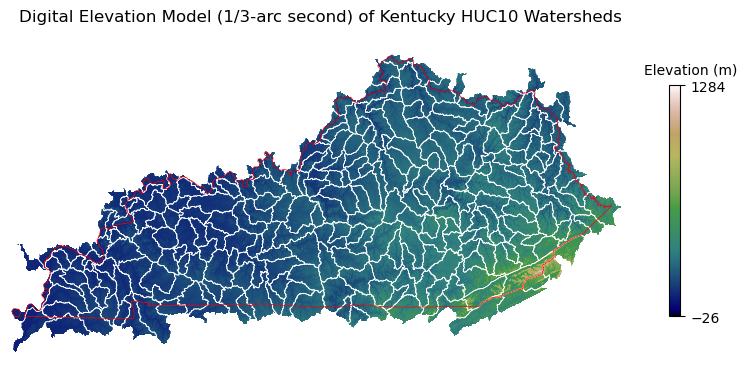

In [17]:
# plot the mosaiced raster...
# create fig and ax objects, define figure size
fig, ax = plt.subplots(figsize=(10, 6))

# plot dem...
cax = show(dem, ax=ax, cmap='gist_earth')

# dem colorbar...
im = cax.get_images()[0]
cbar = fig.colorbar(im, ax=ax, shrink=0.50)
dem_min = np.nanmin(dem.read(1))
dem_max = np.nanmax(dem.read(1))
cbar.set_ticks([dem_min, dem_max])
cbar.set_label('Elevation (m)', labelpad=-25, y=1.1, rotation=0)

# plot watershed outlines...
gdf_huc10.boundary.plot(ax=ax, facecolor='none', edgecolor='white', linewidth=0.5)

# plot ky state outline...
gdf_ky.boundary.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=0.5)

# title and labels...
ax.set_title('Digital Elevation Model (1/3-arc second) of Kentucky HUC10 Watersheds')
ax.axis('off')
plt.show()